Задачи

1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [ ]:
import pandas as pd

import seaborn as sns #подключаем библиотеки на шаге 6, которые нужны для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

user_data = pd.read_csv('/home/jupyter-j-moldovanova/shared/homeworks/python_ds_miniprojects/3/user_data.csv')
logs = pd.read_csv('/home/jupyter-j-moldovanova/shared/homeworks/python_ds_miniprojects/3/logs.csv')

# 1
#импортируем библиотеку pandas
#выгружаем данные user_data и logs

#Описание данных

#user_data:
#client – идентификатор пользователя
#premium – является ли клиент премиум
#age – возраст

#logs:
#client – идентификатор пользователя
#success – результат (успех - 1, нет - 0)
#platform – платформа
#time – время в формате Unix

In [17]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [18]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
# 2.для начала проведем разведывательный анализ данных:

In [14]:
user_data.shape #проверяем размеры таблицы

(2954, 3)

In [13]:
logs.shape

(4500, 4)

In [19]:
user_data.dtypes #смотрим на типы переменных

client     int64
premium     bool
age        int64
dtype: object

In [20]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [21]:
user_data.isna().sum() #проверяем на наличие пропущенных значений

client     0
premium    0
age        0
dtype: int64

In [22]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [23]:
user_data.describe() #выводим описательную статистику

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [26]:
logs.platform.nunique() #смотрим сколько уникальных значений принимает переменная platform

3

In [27]:
logs.platform.unique() #смотрим какие это значения 

array(['phone', 'computer', 'tablet'], dtype=object)

In [ ]:
# 3. рассмотрим какой клиент совершил больше всего успешных операций?

In [36]:
sucsessful_clients = logs \
    .query("success == '1'") \   #рассматриваем только успешные операции
    .groupby('client', as_index = False) \ #сгруппировали по клиентам
    .agg({'success' : 'count'}) \ #для каждого клиента рассчиттваем кол-во успешных операций
    .sort_values('success', ascending = False) \ #сортируем вывод кол-ва успешных операция по убыванию
    .query("success == '41'") \ #увидели, что макс. число операций = 41, оставляем только пользователей с этим кол-вом операций
    .sort_values('client') \ #сортируем ай-ди клиентов по возрастанию
    .client.tolist() #перекидываем колонку клиеентов в список, для более удобной передачи информции о них дальше

In [37]:
sucsessful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
# 4. рассмотрим с какой платформы осуществляется наибольшее количество успешных операций?

In [58]:
sucsessful_platforms = logs \
    .query("success == '1'") \
    .groupby('platform', as_index = False) \
    .agg({'success' : 'count'}) \
    .sort_values('success', ascending = False) \
    .rename(columns={'success' : 'success_amount'})

#рассматриваем только успешные операции
#сгруппировали по платформам
#для каждой платформы рассчиттваем кол-во успешных операций
#сортируем вывод кол-ва успешных операция по убыванию
#переименовали колонку в более подходящее теперь название (теперь в енй хранится не показание успешности операции, а количество успешных операций)

In [59]:
sucsessful_platforms

,platform,success_amount
1,phone,2019
0,computer,1090
2,tablet,180


In [ ]:
# 5. рассмотрим какая платформа наиболее популярна среди премиумных клиентов?

In [47]:
user_data_and_logs = user_data.merge(logs, on = 'client') #сначала объединим две колонки в одну по клиентам

In [49]:
user_data_and_logs.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [53]:
user_data_and_logs.shape #посмотрим размер колонки

(3439, 6)

In [54]:
user_data_and_logs.isna().sum() #проверим на пропущенные значения

client      0
premium     0
age         0
success     0
platform    0
time        0
dtype: int64

In [60]:
sucsessful_platforms_premium_client = user_data_and_logs \
    .query("premium == '1'") \
    .groupby('platform', as_index = False) \
    .agg({'client' : 'count'}) \
    .sort_values('client', ascending = False) \
    .rename(columns={'client' : 'premium_client_amount'})

#аналогично прошлой задаче:
#рассматриваем только премиумных клиентов
#сгруппировали по платформам
#для каждой платформы рассчиттваем кол-во клиентов, которые ей пользуются
#сортируем вывод кол-ва клиентов по убыванию
#также переименовали колонку в более подходящее теперь название 


In [61]:
sucsessful_platforms_premium_client

,platform,premium_client_amount
1,phone,246
0,computer,150
2,tablet,24


In [ ]:
# 6.визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
#для этого вернемся в начало и подключим еще доп. библиотеки
#будем рассматривать объединенный датасет

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


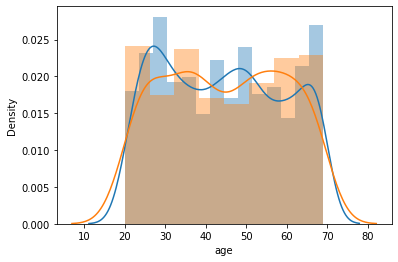

In [74]:
a = user_data_and_logs.query('premium == False')['age']
b = user_data_and_logs.query('premium == True')['age']


sns.distplot(a)
sns.distplot(b)

In [ ]:
# 7 Построим график распределения числа успешных операций, где:
#x – число успешных операций
#y – число клиентов, совершивших столько успешных операций

#будем использовать изначатльный датасет logs

In [107]:
sucsess_distplot1 = logs \
    .query("success == '1'") \
    .groupby('client', as_index = False) \
    .agg({'platform' : 'count'}) \
    .platform.sort_values()

In [108]:
sucsess_distplot1

0        1
1882     1
1883     1
1884     1
1885     1
        ..
810     41
1487    41
1020    41
2626    41
1759    41
Name: platform, Length: 2845, dtype: int64

In [88]:
sucsess_distplot2 = logs \
    .query("success == '1'") \
    .groupby('client', as_index = False) \
    .agg({'client' : 'count'})

In [89]:
sucsess_distplot2

,client
0,1
1,1
2,1
3,1
4,1
...,...
2840,1
2841,1
2842,1
2843,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


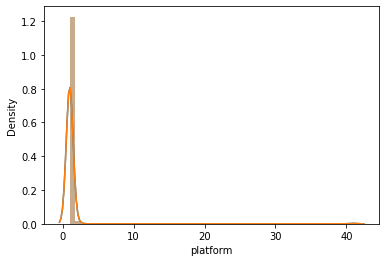

In [112]:
sns.distplot(sucsess_distplot1)
sns.distplot(sucsess_distplot2)

In [ ]:
# 8. Ответим на вопрос: клиенты какого возраста совершили наибольшее количество успешных действий с разных платформ?
#ниже просчитаем сначала все для платформы компьютер, такой же алгоритм расчета будет и для двух других

#для этого:
#Визуализируем число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
#По оси x – возраст, y – число успешных операций. 

In [115]:
age_success = user_data_and_logs.query("success == '1' and platform == 'computer'")

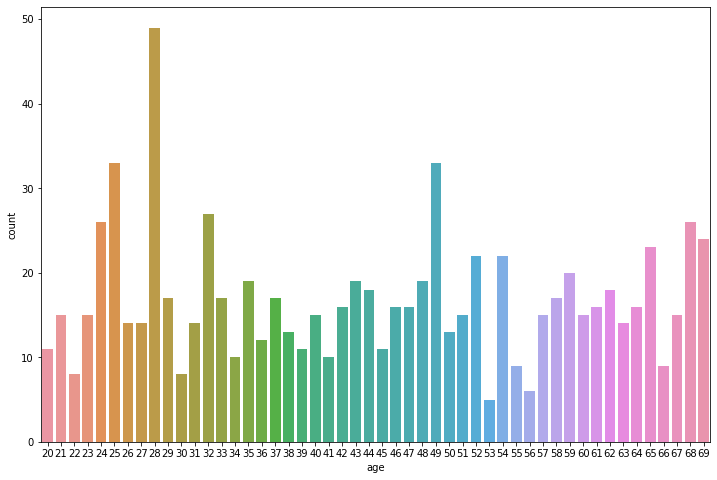

In [128]:
#ax = sns.countplot(x='age', hue='success', data = age_success)
plt.figure(figsize=(12, 8)) #внесем корректировки в размер графика, т.к. он оказался небольшим
ax = sns.countplot(x='age', data = age_success)